In [1]:
import torch
import torchvision
import json
import os
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
import random
from collections import defaultdict
from datetime import datetime


In [2]:
bn_logits_filename = "bn_logits_10_100.npy"

results_path = os.path.join("MNIST", "results")
bn_logits_path = os.path.join(results_path, bn_logits_filename)

data = np.load(bn_logits_path)

In [4]:
data.shape

(100, 60000, 10)

## 2) Difference between embeddings of adjacent epochs

In [ ]:
"""
Statistics of difference:
1) Mean
2) Max
3) L2
4) L1
5) Variance
"""

In [11]:
# emb_t - emb_(t-1)
dif = data[1:] - data[:-1]

In [13]:
dif.shape

(99, 60000, 10)

In [200]:
mean_dif = np.linalg.norm(dif, axis=2, ord=1)

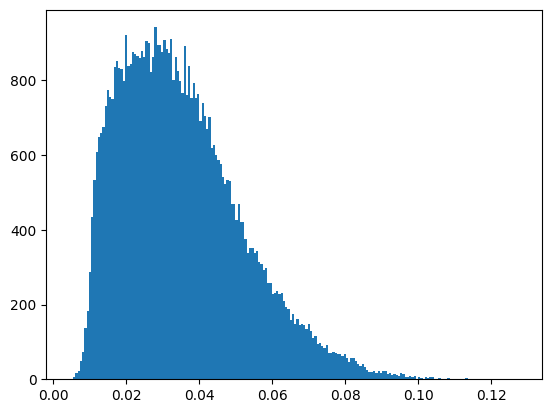

In [201]:
mean_dif_var = mean_dif.var(axis=0)
plt.hist(mean_dif_var, bins=200)
plt.show()

In [218]:
left_tale_mask = mean_dif_var < 0.007
right_tale_mask = mean_dif_var > 0.11

left_tale = mean_dif[:, left_tale_mask]
right_tale = mean_dif[:, right_tale_mask]

left_tale.shape, right_tale.shape

((99, 33), (99, 13))

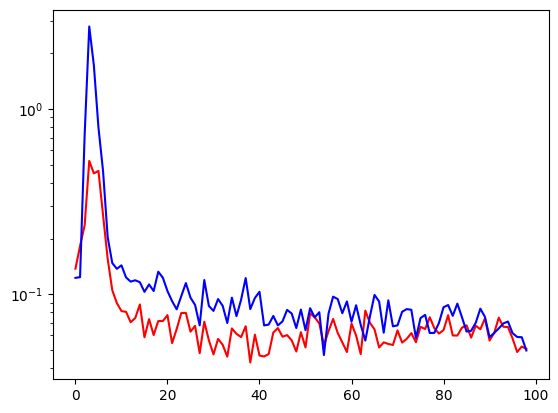

In [219]:
# mean of variance of examples with var of mean difference > threshold
plt.plot(left_tale.mean(axis=1), c='r')
# mean of variance of examples with var of mean difference ~ mean
plt.plot(right_tale.mean(axis=1), c='b')

plt.yscale('log')

plt.show()

In [220]:
right_tale_mask.shape

(60000,)

### Plotting image examples

In [221]:
from torchvision.datasets import MNIST

train_img = MNIST(root="./.cache", download=True).data.numpy()
train_labels = MNIST(root="./.cache", download=True).targets.numpy()

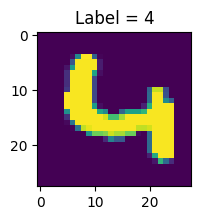

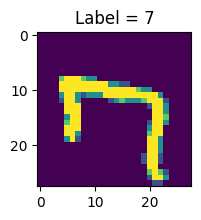

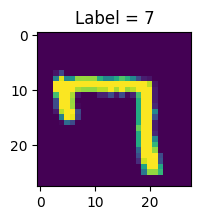

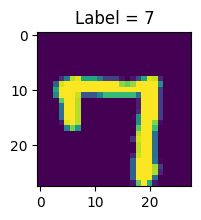

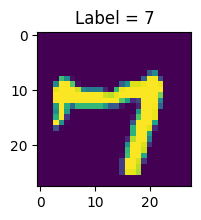

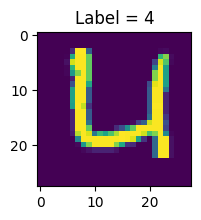

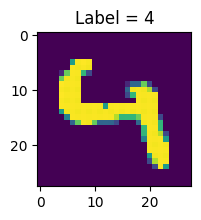

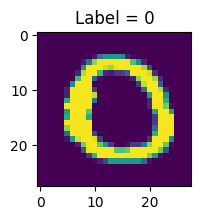

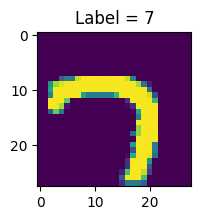

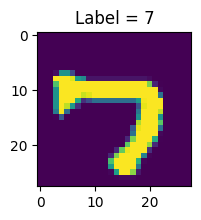

In [222]:
mask_use = right_tale_mask

for sample_id in range(min(mask_use.sum(), 10)):
    plt.figure(figsize=(4,2))
    plt.title(f"Label = {train_labels[mask_use][sample_id]}")
    plt.imshow(train_img[mask_use][sample_id])
    plt.show()

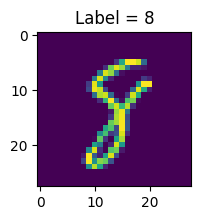

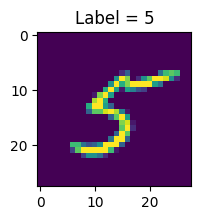

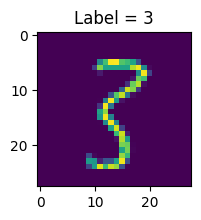

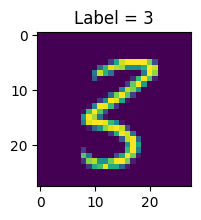

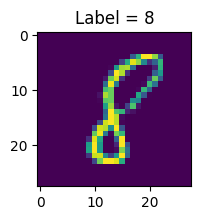

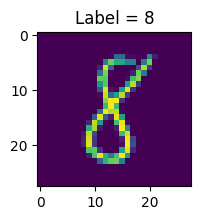

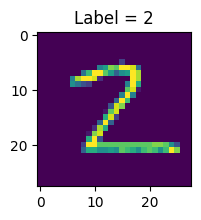

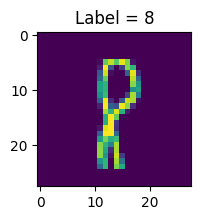

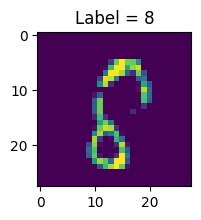

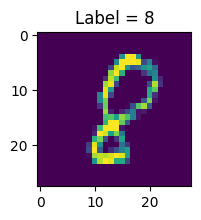

In [223]:
mask_use = left_tale_mask

for sample_id in range(min(mask_use.sum(), 10)):
    plt.figure(figsize=(4,2))
    plt.title(f"Label = {train_labels[mask_use][sample_id]}")
    plt.imshow(train_img[mask_use][sample_id])
    plt.show()